## **개요**

**목표:**</br>
행정구역별로 공공보건의료기관 수를 파악하고 인구수 대비 공공보건의료기관 비율을 비교 분석한다. 분석 결과는 블록맵으로 시각화한다.


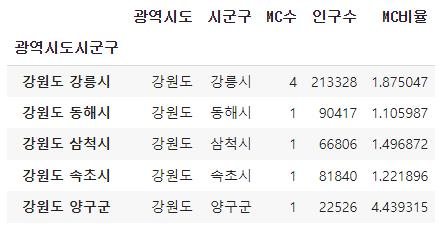

**데이터셋:**
*  전국 공공보건의료기관 현황 데이터: 공공데이터포털 사이트(https://www.data.go.kr/)
*  행정구역별 인구수 데이터: 국가통계포털 사이트(https://kosis.kr/)
*  행정구역 경계선 데이터: data_draw_korea.csv

**파이썬**

* **get()**: 딕셔너리 자료형에서 Key로 Value 얻기
*  **get(x, '디폴트 값')**

In [ ]:
addr_abnorm = {'경기': '경기도', '경남': ' 경상남도', '경북': '경상북도', '충북': '충청북도', '서울시': '서울특별시', '대전시': '대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [ ]:
addr_abnorm.get('경기')

'경기도'

In [ ]:
addr_abnorm.get('경상', '경상북도')

'경상북도'

**판다스(Pandas)**

*  **merge()**

*  **tolist()**: 데이터프레임/시리즈를 리스트로 변환

In [ ]:
df = pd.DataFrame([[ 1, 2, 3, 4, 5.5, 6.7], [ 6, 7, 8, 4, 8.5, 8.7]])
df
listData = df.values.tolist()
listData

[[1.0, 2.0, 3.0, 4.0, 5.5, 6.7], [6.0, 7.0, 8.0, 4.0, 8.5, 8.7]]

*  **rename()**: 컬럼이름 변경

*  **sort_values(by=['열이름'], ascending=False)**: 데이터값(values) 정렬

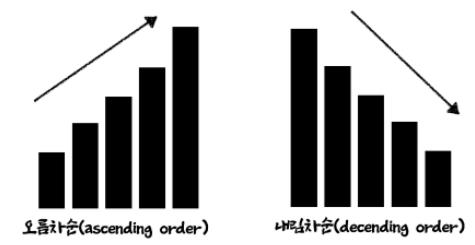

*  오름 차순: 점점 커지도록 정렬
*  내림 차순: 점점 작아지도록 정렬 

**[Review]**
*  **set_index()**
*  **split()**

In [ ]:
v = '안녕하세요 박재완입니다'
v.split()[:1]

['안녕하세요']

*  **lambda 식**



## **행정구역별 데이터 분석 + 블록맵**

### **1) 공공보건의료기관현황 데이터 전처리**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/drive/MyDrive/python_code/dataset/'

In [3]:
publicM_df = pd.read_csv(file_path + '공공보건의료기관현황.csv', index_col = 0, encoding='EUC-KR')

In [4]:
#파일의 인코딩 타입 알아내는 법
"""import chardet
with open(file_path+'공공보건의료기관현황.csv',  'rb') as f:
  result = chardet.detect(f.readline())
  print(result['encoding'])"""

"import chardet\nwith open(file_path+'공공보건의료기관현황.csv',  'rb') as f:\n  result = chardet.detect(f.readline())\n  print(result['encoding'])"

In [5]:
publicM_df

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


**시군구별 공공보건의료기관 수 데이터 프레임 만들기**

In [6]:
"""def split_func(a):
  b= a.split()
  c= b[:2]
  return c

publicM_df['주소'].apply(split_func).tolist()"""

"def split_func(a):\n  b= a.split()\n  c= b[:2]\n  return c\n\npublicM_df['주소'].apply(split_func).tolist()"

In [ ]:
pdf = publicM_df['주소'].apply(lambda v: v.split()[:2]).tolist()
pdf

In [9]:
addr = pd.DataFrame(pdf, columns = ['광역시도', '시군구'])
addr

,광역시도,시군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


**행정구역 데이터 확인 및 수정**

*  **광역시도**

In [ ]:
addr['광역시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [ ]:
addr[addr['광역시도']=='창원시']

,광역시도,시군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [ ]:
addr.loc[27] = ['경상남도', '창원시']
addr.loc[31] = ['경상남도', '창원시']

In [ ]:
addr.loc[27], addr.loc[31]

(광역시도    경상남도
 시군구      창원시
 Name: 27, dtype: object, 광역시도    경상남도
 시군구      창원시
 Name: 31, dtype: object)

In [ ]:
addr[addr['광역시도']=='경산시']

,광역시도,시군구
47,경산시,경안로


In [ ]:
addr.loc[47] = ['경상북도', '경산시']

In [ ]:
addr[addr['광역시도']=='천안시']

,광역시도,시군구
209,천안시,동남구
210,천안시,동남구


In [ ]:
addr.loc[209] = ['충청남도', '천안시']
addr.loc[210] = ['충청남도', '천안시']

*  **get() 메소드를 이용한 데이터 전처리 방법**

In [ ]:
addr['광역시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [ ]:
addr_abnorm = {'경기': '경기도', '경남': ' 경상남도', '경북': '경상북도', '충북': '충청북도', '서울시': '서울특별시', '대전시': '대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도', '부산특별시':'부산광역시'}

In [ ]:
#addr_abnorm.get('경상북도', '경상')

In [ ]:
#def addr_fix(v):
#  a = addr_abnorm.get(v, v)
#  return a

In [ ]:
#addr['광역시도'].apply(addr_fix)

In [ ]:
addr['광역시도']=addr['광역시도'].apply(lambda v: addr_abnorm.get(v, v))

In [ ]:
addr['광역시도'].unique()

array(['강원도', '경기도', ' 경상남도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

*  **시군구**

In [ ]:
addr['시군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [ ]:
addr[addr['시군구']=='아란13길']

,광역시도,시군구
75,제주특별자치도,아란13길


In [ ]:
addr.loc[75] = ['제주특별자치도', '제주시']

In [ ]:
addr.loc[75]

광역시도    제주특별자치도
시군구         제주시
Name: 75, dtype: object

In [ ]:
addr[addr['시군구']=='동매로']

,광역시도,시군구
155,부산광역시,동매로


In [ ]:
addr.loc[155] =  ['부산광역시', '사하구']

In [ ]:
addr.loc[155]

광역시도    부산광역시
시군구       사하구
Name: 155, dtype: object

In [ ]:
#for n in range(len(addr)):
#   addr['광역시도'][n] = addr['광역시도'][n].strip()

In [ ]:
#for n in range(len(addr)):
#   addr['시군구'][n] = addr['시군구'][n].strip()

*  **행정구역별 공공보건의료기관의 수 구하기**

In [ ]:
addr['광역시도시군구'] = addr['광역시도']+' '+ addr['시군구']
addr

,광역시도,시군구,광역시도시군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [ ]:
addr['MC수'] = 0
addr

,광역시도,시군구,광역시도시군구,MC수
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0
...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,0


In [ ]:
addr_df = addr.groupby(['광역시도', '시군구', '광역시도시군구'], as_index = False).count()
addr_df

,광역시도,시군구,광역시도시군구,MC수
0,경상남도,김해시,경상남도 김해시,1
1,경상남도,사천시,경상남도 사천시,2
2,경상남도,양산시,경상남도 양산시,2
3,경상남도,창원시,경상남도 창원시,1
4,경상남도,통영시,경상남도 통영시,1
...,...,...,...,...
138,충청북도,영동군,충청북도 영동군,1
139,충청북도,제천시,충청북도 제천시,1
140,충청북도,청원군,충청북도 청원군,1
141,충청북도,청주시,충청북도 청주시,4


In [ ]:
addr_df[addr_df['광역시도시군구']=="경상남도 김해시"]

,광역시도,시군구,광역시도시군구,MC수


In [ ]:
setIndex_addr_df = addr_df.set_index('광역시도시군구')

In [ ]:
setIndex_addr_df

,광역시도,시군구,MC수
광역시도시군구,,,
경상남도 김해시,경상남도,김해시,1
경상남도 사천시,경상남도,사천시,2
경상남도 양산시,경상남도,양산시,2
경상남도 창원시,경상남도,창원시,1
경상남도 통영시,경상남도,통영시,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


### **2) 행정구역별 인구수 데이터 준비하기**

In [ ]:
pop_df = pd.read_excel(file_path+'행정구역_시군구_별__성별_인구수_2.xlsx')
pop_df

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [ ]:
pop_df = pop_df.rename(columns = {'행정구역(시군구)별(1)':'광역시도', '행정구역(시군구)별(2)':'시군구'})
pop_df

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684
...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774
275,경상남도,합천군,45054,21590,23464
276,제주특별자치도,소계,670749,337231,333518
277,제주특별자치도,제주시,489202,245389,243813


In [ ]:
for n in range(len(pop_df)):
   pop_df['광역시도'][n] = pop_df['광역시도'][n].strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for n in range(len(pop_df)):
   pop_df['시군구'][n] = pop_df['시군구'][n].strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pop_df[pop_df['시군구']=='서원구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
154,충청북도,서원구,202513,100492,102021


In [ ]:
pop_df['시군구'].loc[154] = '서원군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pop_df['시군구'].loc[154]

'서원군'

In [ ]:
pop_df[pop_df['시군구']=='청원구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
155,충청북도,청원구,195404,100038,95366


In [ ]:
pop_df['시군구'].loc[155]='청원군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pop_df['시군구'].loc[155]

'청원군'

In [ ]:
pop_df[pop_df['시군구']=='상당구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
156,충청북도,상당구,179626,89423,90203


In [ ]:
pop_df['시군구'].loc[156] = '상당구'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pop_df['시군구'].loc[156]

'상당구'

In [ ]:
pop_df[pop_df['시군구']=='흥덕구']

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
157,충청북도,흥덕구,262504,133146,129358


In [ ]:
pop_df['시군구'].loc[157] = '흥덕군'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pop_df['시군구'].loc[157]

'흥덕군'

In [ ]:
pop_df['광역시도시군구'] = pop_df['광역시도']+' '+ pop_df['시군구']
pop_df

,광역시도,시군구,총인구수 (명),남자인구수 (명),여자인구수 (명),광역시도시군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
...,...,...,...,...,...,...
274,경상남도,거창군,62049,30275,31774,경상남도 거창군
275,경상남도,합천군,45054,21590,23464,경상남도 합천군
276,제주특별자치도,소계,670749,337231,333518,제주특별자치도 소계
277,제주특별자치도,제주시,489202,245389,243813,제주특별자치도 제주시


In [ ]:
pop_df = pop_df[pop_df['시군구'] != '소계']

In [ ]:
setIndex_pop_df = pop_df.set_index('광역시도시군구')

In [ ]:
addr_pop_df = pd.merge(setIndex_addr_df, setIndex_pop_df, how ='left', left_index = True, right_index = True)
addr_pop_df

,광역시도_x,시군구_x,MC수,광역시도_y,시군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
광역시도시군구,,,,,,,,
경상남도 김해시,경상남도,김해시,1,NaN,NaN,NaN,NaN,NaN
경상남도 사천시,경상남도,사천시,2,NaN,NaN,NaN,NaN,NaN
경상남도 양산시,경상남도,양산시,2,NaN,NaN,NaN,NaN,NaN
경상남도 창원시,경상남도,창원시,1,NaN,NaN,NaN,NaN,NaN
경상남도 통영시,경상남도,통영시,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,48523.0,24060.0,24463.0
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,134359.0,67326.0,67033.0
충청북도 청원군,충청북도,청원군,1,충청북도,청원군,195404.0,100038.0,95366.0


In [ ]:
addr_pop_df.isnull().sum()

광역시도_x       0
시군구_x        0
MC수          0
광역시도_y       5
시군구_y        5
총인구수 (명)     5
남자인구수 (명)    5
여자인구수 (명)    5
dtype: int64

In [ ]:
addr_pop_df[addr_pop_df['시군구_y'].isnull()]

,광역시도_x,시군구_x,MC수,광역시도_y,시군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
광역시도시군구,,,,,,,,
경상남도 김해시,경상남도,김해시,1,NaN,NaN,NaN,NaN,NaN
경상남도 사천시,경상남도,사천시,2,NaN,NaN,NaN,NaN,NaN
경상남도 양산시,경상남도,양산시,2,NaN,NaN,NaN,NaN,NaN
경상남도 창원시,경상남도,창원시,1,NaN,NaN,NaN,NaN,NaN
경상남도 통영시,경상남도,통영시,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratio_df = addr_pop_df[['광역시도_x',	'시군구_x',	'MC수',	'총인구수 (명)']]

In [ ]:
ratio_df['MC비율'] = ratio_df['MC수']/ratio_df['총인구수 (명)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ratio_df

,광역시도_x,시군구_x,MC수,총인구수 (명),MC비율
광역시도시군구,,,,,
경상남도 김해시,경상남도,김해시,1,NaN,NaN
경상남도 사천시,경상남도,사천시,2,NaN,NaN
경상남도 양산시,경상남도,양산시,2,NaN,NaN
경상남도 창원시,경상남도,창원시,1,NaN,NaN
경상남도 통영시,경상남도,통영시,1,NaN,NaN
...,...,...,...,...,...
충청북도 영동군,충청북도,영동군,1,48523.0,0.000021
충청북도 제천시,충청북도,제천시,1,134359.0,0.000007
충청북도 청원군,충청북도,청원군,1,195404.0,0.000005


In [ ]:
ratio_df['MC비율'] = ratio_df['MC비율']*100000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ratio_df = ratio_df.rename(columns={'광역시도_x':'광역시도', '시군구_x':'시군구', '총인구수 (명)':'인구수'})

In [ ]:
ratio_df.head()

,광역시도,시군구,MC수,인구수,MC비율
광역시도시군구,,,,,
경상남도 김해시,경상남도,김해시,1,NaN,NaN
경상남도 사천시,경상남도,사천시,2,NaN,NaN
경상남도 양산시,경상남도,양산시,2,NaN,NaN
경상남도 창원시,경상남도,창원시,1,NaN,NaN
경상남도 통영시,경상남도,통영시,1,NaN,NaN


In [ ]:
ratio_df.sort_values(by=['MC비율'],  ascending=False)

,광역시도,시군구,MC수,인구수,MC비율
광역시도시군구,,,,,
경상북도 울릉군,경상북도,울릉군,1,9521.0,10.503098
전라남도 함평군,전라남도,함평군,2,32785.0,6.100351
강원도 정선군,강원도,정선군,2,37194.0,5.377211
인천광역시 옹진군,인천광역시,옹진군,1,20486.0,4.881382
강원도 양구군,강원도,양구군,1,22526.0,4.439315
...,...,...,...,...,...
경상남도 김해시,경상남도,김해시,1,NaN,NaN
경상남도 사천시,경상남도,사천시,2,NaN,NaN
경상남도 양산시,경상남도,양산시,2,NaN,NaN
